# Imports e inicialización del DataFrame

In [117]:
!pip install squarify
import pandas as pd
import numpy as np
import seaborn as sns
import squarify # pip install squarify
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [119]:
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#from google.colab import files 
#uploaded = files.upload()


In [120]:
#link = 'https://drive.google.com/file/d/1dOMHOcmTuEUmN6-OwaXzxmwtrSglE4fC/view'
#id = link.split("/")[-2] 
  
#downloaded = drive.CreateFile({'id':id})  
#downloaded.GetContentFile('Entrenamieto_ECI_2020.csv')  

In [121]:
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

entrenamientoDf = pd.read_csv('Entrenamieto_ECI_2020.csv')
entrenamientoDf.head(100)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.59,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.60,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,Non

In [122]:
entrenamientoDf['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

# 1)Análisis del DataFrame


In [123]:
"""entrenamientoDf["Region"] = entrenamientoDf["Region"].astype("category")
entrenamientoDf["Territory"] = entrenamientoDf["Territory"].astype("category")
entrenamientoDf["Bureaucratic_Code"] = entrenamientoDf["Bureaucratic_Code"].astype("category")
#correccion del nombre de la columna Source.
entrenamientoDf.rename(columns={"Source ":"Source"},inplace=True)
entrenamientoDf["Source"] = entrenamientoDf["Source"].astype("category")
entrenamientoDf["Billing_Country"] = entrenamientoDf["Billing_Country"].astype("category")
entrenamientoDf["Account_Name"] = entrenamientoDf["Account_Name"].astype("category")
entrenamientoDf["Opportunity_Name"] = entrenamientoDf["Opportunity_Name"].astype("category")
entrenamientoDf["Account_Owner"] = entrenamientoDf["Account_Owner"].astype("category")
entrenamientoDf["Account_Type"] = entrenamientoDf["Account_Type"].astype("category")
entrenamientoDf["Opportunity_Type"] = entrenamientoDf["Opportunity_Type"].astype("category")
entrenamientoDf["Quote_Type"] = entrenamientoDf["Quote_Type"].astype("category")
entrenamientoDf["Delivery_Terms"] = entrenamientoDf["Delivery_Terms"].astype("category")
entrenamientoDf["Brand"] = entrenamientoDf["Brand"].astype("category")
entrenamientoDf["Product_Type"] = entrenamientoDf["Product_Type"].astype("category")
entrenamientoDf["Size"] = entrenamientoDf["Size"].astype("category")
entrenamientoDf["Product_Category_B"] = entrenamientoDf["Product_Category_B"].astype("category")
entrenamientoDf["Currency"] = entrenamientoDf["Currency"].astype("category")
entrenamientoDf["Last_Modified_By"] = entrenamientoDf["Last_Modified_By"].astype("category")
entrenamientoDf["Product_Family"] = entrenamientoDf["Product_Family"].astype("category")
entrenamientoDf["Product_Name"] = entrenamientoDf["Product_Name"].astype("category")
entrenamientoDf["ASP_Currency"] = entrenamientoDf["ASP_Currency"].astype("category")
entrenamientoDf["ASP_(converted)_Currency"] = entrenamientoDf["ASP_(converted)_Currency"].astype("category")
entrenamientoDf["Delivery_Quarter"] = entrenamientoDf["Delivery_Quarter"].astype("category")
entrenamientoDf["Total_Taxable_Amount_Currency"] = entrenamientoDf["Total_Taxable_Amount_Currency"].astype("category")
entrenamientoDf["Stage"] = entrenamientoDf["Stage"].astype("category")
entrenamientoDf["Prod_Category_A"] = entrenamientoDf["Prod_Category_A"].astype("category)"""

#Las columnas de ASP,ASP_(converted) y Total_Amount tienen elementos nulos
entrenamientoDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

Aqui podemos ver que las columnas:
  
1.   ASP
2.   ASP_converted
3.   Total_Amount

Tienen elementos nulos


In [124]:
#Me fijo si hay columnas con valores nulos.
entrenamientoDf.isnull().any()

ID                                    False
Region                                False
Territory                             False
Pricing, Delivery_Terms_Quote_Appr    False
Pricing, Delivery_Terms_Approved      False
Bureaucratic_Code_0_Approval          False
Bureaucratic_Code_0_Approved          False
Submitted_for_Approval                False
Bureaucratic_Code                     False
Account_Created_Date                  False
Source                                False
Billing_Country                       False
Account_Name                          False
Opportunity_Name                      False
Opportunity_ID                        False
Sales_Contract_No                     False
Account_Owner                         False
Opportunity_Owner                     False
Account_Type                          False
Opportunity_Type                      False
Quote_Type                            False
Delivery_Terms                        False
Opportunity_Created_Date        

In [125]:
entrenamientoDf['Last_Activity'].value_counts()

NaT    16947
Name: Last_Activity, dtype: int64

In [126]:
entrenamientoDf['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [127]:
#entrenamientoDf.groupby(['Product_Name','ASP','TRF']).count()

In [128]:
entrenamientoDf['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [129]:
entrenamientoDf['Product_Name'].value_counts()

Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
                   ... 
Product_Name_236      1
Product_Name_501      1
Product_Name_510      1
Product_Name_511      1
Product_Name_359      1
Name: Product_Name, Length: 456, dtype: int64

In [130]:
entrenamientoDf[(entrenamientoDf['ASP_Currency']=='JPY')]['ASP'].value_counts()

 0.00    228
55.00    156
65.00    153
68.00    139
50.00    121
53.00    109
75.00     99
78.00     86
45.00     74
48.00     62
46.00     57
59.00     38
51.00     38
40.00     33
57.00     32
66.00     27
56.00     25
49.00     22
54.00     20
72.00     20
67.00     16
44.00     16
42.00     16
71.00     15
80.00     14
52.00     12
60.00     12
62.00     12
77.00     12
43.00     11
70.00     11
38.00     10
74.00     10
73.00     10
69.00     10
47.00      9
58.00      8
37.00      7
39.00      6
41.00      6
76.00      6
36.00      5
63.00      4
61.00      3
64.00      2
35.00      1
34.00      1
30.00      1
33.00      1
Name: ASP, dtype: int64

In [131]:
entrenamientoDf['Price'].value_counts()

None     15982
Other      609
0.24        27
0.41        22
0.28        20
0.27        18
0.29        17
0.32        15
0.38        14
0.35        14
0.23        13
0.33        12
0.42        12
0.34        11
0.26        11
0.3         11
0.31        10
0.245        8
0.25         7
0.305        7
0.335        6
0.325        6
0.47         6
0.22         6
0.225        6
0.45         6
0.39         6
0.2          5
0.37         4
0.275        4
0.285        4
0.36         4
0.445        4
0.265        3
0.355        3
0.295        3
0.255        3
0.48         2
0.52         2
0.49         2
0.4          2
0.56         2
0.44         2
0.505        2
0.215        2
0.235        2
0.315        2
0.375        2
0.345        2
0.21         1
0.365        1
0.55         1
0.465        1
Name: Price, dtype: int64

In [132]:
entrenamientoDf['Stage']=='Closed_Won'

0        False
1        False
2        False
3        False
4        False
         ...  
16942    False
16943    False
16944    False
16945    False
16946    False
Name: Stage, Length: 16947, dtype: bool

In [133]:
entrenamientoDf['Territory'].value_counts()

None                    4999
Germany                 1682
NW America              1568
Australia               1208
India                    809
NE America               760
Japan                    681
Netherlands              533
SE America               493
France                   449
Singapore                441
United Kingdom           313
Belgium                  285
Italy                    283
Spain                    268
Central US               254
China (PRC)              218
SW America               206
Thailand                 173
Indonesia                154
Austria                  145
Philippines              109
Jordan                   102
Canada                    74
Luxembourg                70
Portugal                  66
Poland                    60
Vietnam                   51
Cyprus                    44
New Zealand               38
Denmark                   38
Taiwan                    33
Carribean                 31
UAE (Dubai)               31
Turkey        

In [134]:
entrenamientoDf.groupby(['Region','Stage']).agg({'ASP':'mean','ASP_(converted)':'mean'}).head()

ASP      ASP_(converted)
Region   Stage                                                  
APAC     Closed Lost                   0.41                 0.39
         Closed Won                    0.39                 0.35
         Proposal                      0.32                 0.32
         Qualification                 0.30                 0.30
Americas Closed Lost                   0.46                 0.46

In [135]:
entrenamientoDf['Billing_Country'].value_counts()

Japan                                         4879
United States                                 3802
Germany                                       1979
Australia                                     1169
India                                          672
Netherlands                                    563
Singapore                                      432
France                                         396
Spain                                          317
Italy                                          295
United Kingdom                                 284
Belgium                                        226
China                                          222
Thailand                                       195
Austria                                        145
Indonesia                                      142
Philippines                                    138
Luxembourg                                     136
Canada                                         120
Jordan                         

# A) Análisis columna Total Taxable Amount

Hipótesis: La columna Total_Taxable_Amount es el total de la suma del Total_Amount de cada uno de los items de una oportunidad. 

In [136]:
grouped_by_oportunity_name = entrenamientoDf.groupby(['Opportunity_Name']).agg({'ASP':'count','Total_Amount':'sum','Total_Taxable_Amount': 'max'})

In [137]:
grouped_by_oportunity_name = grouped_by_oportunity_name.rename(columns={'ASP':'items_per_oport','Total_Amount':'Total_Amount_Sum'})

In [138]:
grouped_by_oportunity_name.reset_index()

,Opportunity_Name,items_per_oport,Total_Amount_Sum,Total_Taxable_Amount
0,Opportunity_Name_0,7,"3,494,400.00","3,494,400.00"
1,Opportunity_Name_1,7,"2,193,100.00","2,193,100.00"
2,Opportunity_Name_100,1,"543,780.00","543,780.00"
3,Opportunity_Name_1000,1,"142,142,000.00","142,142,000.00"
4,Opportunity_Name_10000,1,"19,600.00",0.00
...,...,...,...,...
9836,Opportunity_Name_9992,1,"175,190.40",0.00
9837,Opportunity_Name_9995,1,"1,043,490.00","1,043,490.00"
9838,Opportunity_Name_9996,1,"790,246.88","790,246.88"
9839,Opportunity_Name_9997,1,"3,799,810.00","3,799,810.00"


Conclusión: Podemos ver que la columna Total Taxable Amount coincide con la suma del Amount de cada uno de los items de una misma oportunidad de venta.

In [139]:
grouped_by_oportunity_name = grouped_by_oportunity_name.merge(entrenamientoDf[['Stage','Opportunity_Name']],on='Opportunity_Name')

In [140]:
grouped_by_oportunity_name = grouped_by_oportunity_name.drop_duplicates(subset='Opportunity_Name')

In [141]:
#otra forma de obtener lo mismo de arriba.
grouped_by_oportunity_name.merge(entrenamientoDf.Opportunity_Name.drop_duplicates(),on='Opportunity_Name',how="right").nlargest(10,'Total_Amount_Sum')

,Opportunity_Name,items_per_oport,Total_Amount_Sum,Total_Taxable_Amount,Stage
5586,Opportunity_Name_5000,1,"1,320,000,000.00","11,867,301.99",Proposal
6229,Opportunity_Name_5778,1,"919,992,410.00","919,992,410.00",Closed Lost
5558,Opportunity_Name_496,1,"760,000,000.00","760,000,000.00",Proposal
5499,Opportunity_Name_4881,1,"660,005,280.00","660,005,280.00",Closed Lost
5496,Opportunity_Name_4879,1,"660,004,620.00","660,004,620.00",Qualification
6303,Opportunity_Name_5860,1,"523,138,680.00","523,138,680.00",Closed Lost
6642,Opportunity_Name_6236,1,"400,000,000.00","400,000,000.00",Closed Lost
5564,Opportunity_Name_4974,1,"389,880,000.00","389,880,000.00",Proposal
7213,Opportunity_Name_6879,1,"315,000,081.90","315,000,081.90",Closed Lost
4644,Opportunity_Name_3875,1,"256,201,545.60","256,201,545.60",Closed Lost


In [142]:
grouped_by_oportunity_name.nlargest(10, 'Total_Taxable_Amount')

,Opportunity_Name,items_per_oport,Total_Amount_Sum,Total_Taxable_Amount,Stage
12105,Opportunity_Name_6550,1,"12,194,000.00","1,356,338,620.00",Closed Won
10741,Opportunity_Name_5778,1,"919,992,410.00","919,992,410.00",Closed Lost
9540,Opportunity_Name_496,1,"760,000,000.00","760,000,000.00",Proposal
9413,Opportunity_Name_4881,1,"660,005,280.00","660,005,280.00",Closed Lost
9404,Opportunity_Name_4879,1,"660,004,620.00","660,004,620.00",Qualification
10844,Opportunity_Name_5860,1,"523,138,680.00","523,138,680.00",Closed Lost
11744,Opportunity_Name_6236,1,"400,000,000.00","400,000,000.00",Closed Lost
9546,Opportunity_Name_4974,1,"389,880,000.00","389,880,000.00",Proposal
12726,Opportunity_Name_6879,1,"315,000,081.90","315,000,081.90",Closed Lost
7989,Opportunity_Name_3875,1,"256,201,545.60","256,201,545.60",Closed Lost


# B) Analizamos performance de los vendedores.

In [143]:
# Primero filtro y me quedo con las ventas realizadas

df_closed_won = entrenamientoDf[entrenamientoDf['Stage']=='Closed Won']

In [144]:
df_closed_won['Total_Taxable_Amount_USD'] = (df_closed_won['ASP_(converted)'] / df_closed_won['ASP']) * (df_closed_won['Total_Taxable_Amount'])
df_closed_won['Total_Taxable_Amount_Millions_USD'] = df_closed_won['Total_Taxable_Amount_USD'] / 10**6

<ipython-input-144-235e5247065f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closed_won['Total_Taxable_Amount_USD'] = (df_closed_won['ASP_(converted)'] / df_closed_won['ASP']) * (df_closed_won['Total_Taxable_Amount'])
<ipython-input-144-235e5247065f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closed_won['Total_Taxable_Amount_Millions_USD'] = df_closed_won['Total_Taxable_Amount_USD'] / 10**6


In [145]:
df_closed_won.nlargest(5, 'Total_Taxable_Amount_USD')

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Taxable_Amount_USD,Total_Taxable_Amount_Millions_USD
2200,27692,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,6/11/2015,Source_3,Japan,Account_Name_1074,Opportunity_Name_6550,1248,116,Person_Name_61,Person_Name_66,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_5,2/19/2016,None,None,None,None,None,None,NaT,3/23/2016,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,USD,67.00,USD,67.00,3/1/2016,3/11/2016,2016 - 3,Q1,2016,NaT,0,USD,"12,194,000.00",JPY,"1,356,338,620.00",Closed Won,Prod_Category_A_None,"1,356,338,620.00","1,356.34"
16135,20265,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_164,Product_Name_308,USD,0.69,USD,0.69,4/1/2016,4/30/2016,2016 - 4,Q2,2016,NaT,6,USD,"3,992,215.34",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63
16136,20268,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_158,Product_Name_285,USD,0.69,USD,0.69,4/1/2016,4/30/2016,2016 - 4,Q2,2016,NaT,2,USD,"1,289,309.84",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63
16137,20271,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_164,Product_Name_307,USD,0.69,USD,0.69,3/1/2016,3/31/2016,2016 - 3,Q1,2016,NaT,21,USD,"14,410,505.18",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63
16138,20274,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_158,Product_Name_286,USD,0.69,USD,0.69,3/1/2016,3/31/2016,2016 - 3,Q1,2016,NaT,15,USD,"10,597,690.85",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63


Agrupo por vendedor

In [146]:
total_sells_per_seller = df_closed_won.groupby('Opportunity_Owner').agg({'Total_Taxable_Amount_USD':'sum'})

In [147]:
# Los mejores 5 vendedores en base a la cantidad de dinero ingresado en la empresa por sus ventas

total_sells_per_seller.nlargest(5, 'Total_Taxable_Amount_USD')

,Total_Taxable_Amount_USD
Opportunity_Owner,
Person_Name_8,"4,050,474,355.81"
Person_Name_66,"1,424,166,814.18"
Person_Name_13,"655,147,097.41"
Person_Name_4,"320,394,540.09"
Person_Name_12,"210,630,603.30"


Analizamos el porcentaje de oportunidades cerradas exitosamente por cada vendedor.

In [148]:
df_sellers = entrenamientoDf[['Stage','Opportunity_Owner','Opportunity_Name']]

In [149]:
# Cada oportunidad puede tener asociadas varios registros. Nos quedamos unicamente con un registro por oportunidad.
# Tomamos como hipótesis que una oportunidad tiene asociada un único vendedor

df_sellers = df_sellers.drop_duplicates(subset='Opportunity_Name')

In [150]:
# Calculamos el promedio de cada Stage para cada vendedor

stages = df_sellers.groupby('Opportunity_Owner')["Stage"]
stages = stages.value_counts() / stages.count()
stages = stages.to_frame().unstack().fillna(0)
stages.columns = ['prom_lost','prom_won','prom_proposal','prom_qualification','prom_negotiation']
stages.nlargest(5,'prom_won')

,prom_lost,prom_won,prom_proposal,prom_qualification,prom_negotiation
Opportunity_Owner,,,,,
Person_Name_30,0.00,1.00,0.00,0.00,0.00
Person_Name_19,0.03,0.97,0.00,0.00,0.00
Person_Name_40,0.12,0.88,0.00,0.00,0.00
Person_Name_52,0.22,0.78,0.00,0.00,0.00
Person_Name_32,0.23,0.77,0.00,0.00,0.00


Podemos ver que estos resultados pueden no estar siendo representativos debido al problema relacionado con *La ecuación más peligrosa de la historia*. 

Para solucionarlo, filtramos el data frame y nos quedamos únicamente con los vendedores que tengan más de x oportunidades asociadas, dónde x vamos a tomarlo como el promedio de oportunidades por vendedor.

In [151]:
promedio_opor_vendedor = df_sellers.groupby('Opportunity_Owner')['Stage'].count().mean()
promedio_opor_vendedor

185.67924528301887

In [152]:
# Repetimos mismos cálculos de antes, pero quedandonos únicamente con los vendedores
# que tengan asociados más de 185 oportunidades.

df_sellers['cant_oport'] = df_sellers.groupby('Opportunity_Owner')['Stage'].transform('count')

In [153]:
df_sellers

,Stage,Opportunity_Owner,Opportunity_Name,cant_oport
0,Closed Lost,Person_Name_18,Opportunity_Name_12598,682
1,Closed Won,Person_Name_20,Opportunity_Name_12600,42
2,Closed Won,Person_Name_8,Opportunity_Name_469,763
3,Closed Lost,Person_Name_8,Opportunity_Name_415,763
4,Closed Lost,Person_Name_8,Opportunity_Name_851,763
...,...,...,...,...
16939,Closed Won,Person_Name_13,Opportunity_Name_7202,757
16940,Closed Lost,Person_Name_13,Opportunity_Name_11979,757
16942,Closed Won,Person_Name_13,Opportunity_Name_9245,757
16945,Closed Lost,Person_Name_3,Opportunity_Name_5843,578


In [154]:
df_sellers_filtrado = df_sellers.loc[df_sellers['cant_oport'] >= promedio_opor_vendedor]

In [155]:
df_sellers_filtrado

,Stage,Opportunity_Owner,Opportunity_Name,cant_oport
0,Closed Lost,Person_Name_18,Opportunity_Name_12598,682
2,Closed Won,Person_Name_8,Opportunity_Name_469,763
3,Closed Lost,Person_Name_8,Opportunity_Name_415,763
4,Closed Lost,Person_Name_8,Opportunity_Name_851,763
5,Closed Lost,Person_Name_8,Opportunity_Name_939,763
...,...,...,...,...
16939,Closed Won,Person_Name_13,Opportunity_Name_7202,757
16940,Closed Lost,Person_Name_13,Opportunity_Name_11979,757
16942,Closed Won,Person_Name_13,Opportunity_Name_9245,757
16945,Closed Lost,Person_Name_3,Opportunity_Name_5843,578


In [156]:
opportunityStages = df_sellers_filtrado.groupby('Opportunity_Owner')["Stage"]
#print(opportunityStages.value_counts())
opportunityStages = opportunityStages.value_counts() / opportunityStages.count()

opportunityStages = opportunityStages.to_frame().unstack().fillna(0)
opportunityStages.columns = ['prom_lost','prom_won','prom_proposal','prom_qualification','prom_negotiation']
opportunityStages.nlargest(5,'prom_won')

,prom_lost,prom_won,prom_proposal,prom_qualification,prom_negotiation
Opportunity_Owner,,,,,
Person_Name_19,0.03,0.97,0.00,0.00,0.00
Person_Name_32,0.23,0.77,0.00,0.00,0.00
Person_Name_64,0.31,0.67,0.01,0.00,0.00
Person_Name_66,0.33,0.65,0.00,0.02,0.00
Person_Name_50,0.37,0.62,0.00,0.00,0.01


Conclusión: Podemos ver que el resultado cambio, pero consideramos a estos últimos más representativos ya que no estamos teniendo en cuenta a los vendedores con pocos registros asociados.

# C) Analizamos regiones más calientes en cuanto a ingresos monetarios.

Chequeamos que todos los registros con Stage Closed_Won tengan un Average Selling Price


In [157]:
dfAux = df_closed_won['ASP']=='nan'
dfAux.value_counts()

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


False    9533
Name: ASP, dtype: int64

Convertimos la columna de Total_Taxable_Amount a una misma moneda, en este caso el dólar.

**Analizar casos especiales en los que no podemos realizar la conversión de JPY a USD**

In [158]:
dfAux = df_closed_won[(df_closed_won['Total_Taxable_Amount_Currency']=='JPY') & (df_closed_won['ASP_Currency']=='USD')]
dfAux

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Taxable_Amount_USD,Total_Taxable_Amount_Millions_USD
2200,27692,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,6/11/2015,Source_3,Japan,Account_Name_1074,Opportunity_Name_6550,1248,116,Person_Name_61,Person_Name_66,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_5,2/19/2016,None,None,None,None,None,None,NaT,3/23/2016,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,USD,67.00,USD,67.00,3/1/2016,3/11/2016,2016 - 3,Q1,2016,NaT,0,USD,"12,194,000.00",JPY,"1,356,338,620.00",Closed Won,Prod_Category_A_None,"1,356,338,620.00","1,356.34"
4805,21902,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_7751,2849,872,Person_Name_32,Person_Name_50,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_4,10/24/2016,None,None,None,None,None,None,NaT,10/24/2016,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,USD,0.49,USD,0.49,10/25/2016,10/25/2016,2016 - 10,Q4,2016,NaT,0,USD,"4,968.60",JPY,"552,657.00",Closed Won,Prod_Category_A_None,"552,657.00",0.55


Nos quedamos con las columnas que nos interesan para el análisis que queremos hacer.

In [159]:
closedWonShorted = df_closed_won[['Total_Taxable_Amount_Millions_USD','Region','Opportunity_Name']]

In [160]:
closedWonShorted.head(10)

,Total_Taxable_Amount_Millions_USD,Region,Opportunity_Name
1,0.05,EMEA,Opportunity_Name_12600
2,0.08,Americas,Opportunity_Name_469
7,0.05,Americas,Opportunity_Name_8227
23,1.62,APAC,Opportunity_Name_7036
63,0.12,EMEA,Opportunity_Name_4062
64,3.18,Americas,Opportunity_Name_6397
65,0.00,Japan,Opportunity_Name_5583
66,0.24,EMEA,Opportunity_Name_2804
67,0.24,EMEA,Opportunity_Name_2801
70,0.48,EMEA,Opportunity_Name_12137


Nos quedamos únicamente con un registro por oportunidad.

In [161]:
closedWonNoDuplicates = closedWonShorted.drop_duplicates(subset='Opportunity_Name')

In [162]:
closedWonNoDuplicates.head()

,Total_Taxable_Amount_Millions_USD,Region,Opportunity_Name
1,0.05,EMEA,Opportunity_Name_12600
2,0.08,Americas,Opportunity_Name_469
7,0.05,Americas,Opportunity_Name_8227
23,1.62,APAC,Opportunity_Name_7036
63,0.12,EMEA,Opportunity_Name_4062


Agrupamos por región, y sumamos el monto a cobrar.

In [163]:
closedWonGroupedRegion = closedWonNoDuplicates.groupby('Region').agg({'Total_Taxable_Amount_Millions_USD':'sum'})
closedWonGroupedRegion = closedWonGroupedRegion.reset_index()
closedWonGroupedRegion

,Region,Total_Taxable_Amount_Millions_USD
0,APAC,200.21
1,Americas,748.26
2,EMEA,582.03
3,Japan,"1,457.18"
4,Middle East,4.75


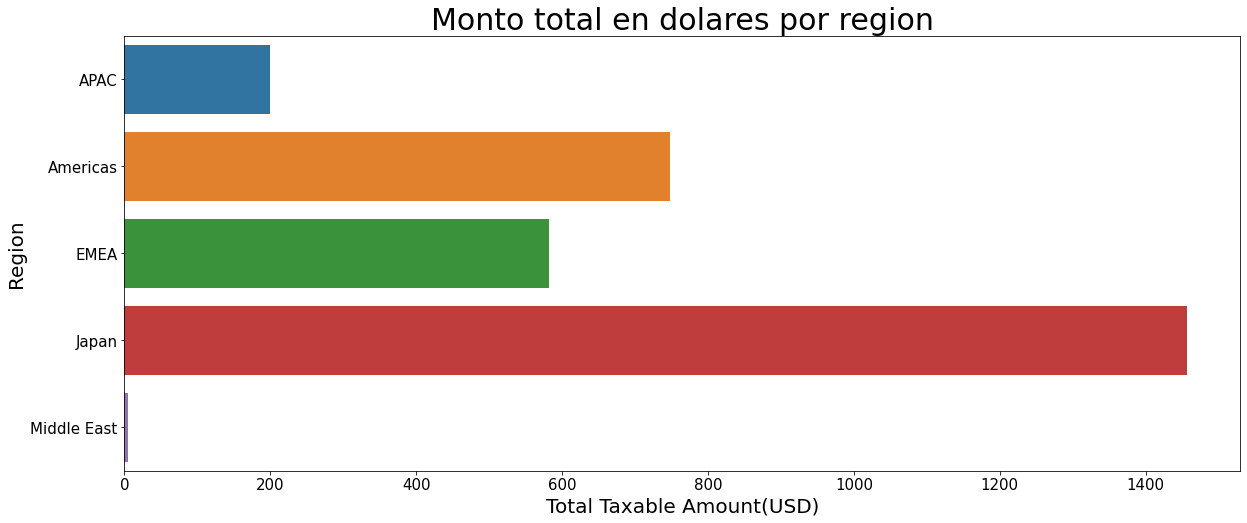

In [164]:
plt.figure(figsize=(20,8))
closedWonPlot = sns.barplot(y='Region', \
                                       x='Total_Taxable_Amount_Millions_USD', \
                                       orient='h', \
                                       data=closedWonGroupedRegion)
closedWonPlot.set_title("Monto total en dolares por region",fontsize=30)
closedWonPlot.set_xlabel("Total Taxable Amount(USD)",fontsize=20)
closedWonPlot.set_ylabel("Region",fontsize=20)
closedWonPlot.tick_params(labelsize=15)

# D) ANALISIS DE PORCENTAJE EXITO REGIONES

Una renglón representa un item de la oportunidad. Hay que eliminar los duplicados por oportunidad para no tomar en cuenta dos veces el estado de la misma oportunidad. 

In [165]:
# Pregunta: Cual es la relacion entre la cantidad de casos con casos cerrados de manera exitosa por region ?
auxiliar_df = entrenamientoDf

#Eliminamos los Opportunity_Name duplicados para tener la cantidad neta de oportunidades
auxiliar_df = auxiliar_df.drop_duplicates(subset='Opportunity_Name')

# Nos guardamos en la columna Stage_Won los casos terminados en Closed Won

# ROMPE!!!! Comente tu linea y puse un posible arreglo,fijate si era lo que buscabas
#auxiliar_df["Stage_Won"] = auxiliar_df[auxiliar_df["Stage"] == "Closed Won"]
auxiliar_df["Stage_Won"] = auxiliar_df["Stage"] == "Closed Won"
auxiliar_df["Stage_Lost"] = auxiliar_df["Stage"] == "Closed Lost"

# Agrupo segun region y sus cantidades de Stages y Stages_Won
#casos_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage": "count", "Stage_Won" : "count"})
casos_ganados_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage_Won" : ['mean']}).reset_index()


casos_perdidos_segun_region =  auxiliar_df.groupby(["Region"]).agg({"Stage_Lost" : ['mean']}).reset_index()

porcentaje_ganados_perdidos_region = casos_perdidos_segun_region.merge(casos_ganados_segun_region)
porcentaje_ganados_perdidos_region["Other"] = 1 - (porcentaje_ganados_perdidos_region["Stage_Won"] + porcentaje_ganados_perdidos_region["Stage_Lost"])
porcentaje_ganados_perdidos_region.to_csv("porcentaje_stages_regiones.csv")

<ipython-input-165-831656e4afa8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxiliar_df["Stage_Won"] = auxiliar_df["Stage"] == "Closed Won"
<ipython-input-165-831656e4afa8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxiliar_df["Stage_Lost"] = auxiliar_df["Stage"] == "Closed Lost"


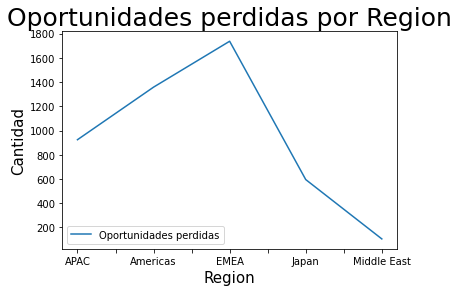

In [166]:
#Analisis casos perdidos region
casos_perdidos_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage_Lost" : ['sum']})
casos_perdidos_segun_region.columns = ['Oportunidades perdidas']
casos_perdidos_segun_region.to_csv("casos_perdidos_segun_region.csv")
casos_perdidos_segun_region = casos_perdidos_segun_region.plot()
casos_perdidos_segun_region.set_title('Oportunidades perdidas por Region',fontsize=25)
casos_perdidos_segun_region.set_xlabel("Region",fontsize=15)
casos_perdidos_segun_region.set_ylabel("Cantidad",fontsize=15)
plt.savefig("oportunidades_perdidas_regiones.png", bbox_inches='tight')

In [167]:
#Grafico mejorado
plt.figure(figsize=(15,8))

x = casos_ganados_segun_region.index
y = casos_ganados_segun_region['Casos ganados']
z = casos_ganados_segun_region['Cantidad de oportunidades']

relacion_totales_ganadas_plot = plt.subplot(111)
relacion_totales_ganadas_plot.bar(x, z, width=0.5, color='lightseagreen', align='center')
relacion_totales_ganadas_plot.bar(x, y, width=0.5, color='tab:green', align='center')

relacion_totales_ganadas_plot.set_title('Relacion entre oportunidades ganadas y totales por region',fontsize=25)
relacion_totales_ganadas_plot.set_xlabel("Region",fontsize=15)
relacion_totales_ganadas_plot.set_ylabel("Cantidad",fontsize=15)
relacion_totales_ganadas_plot.legend(['Total de oportunidades','Casos ganados'],fontsize=15)

plt.savefig("oportunidades_totaless_regiones.png", bbox_inches='tight')

KeyError: 'Casos ganados'

<Figure size 1080x576 with 0 Axes>

# E) Analisis de porcentaje de exito segun si necesita codigo burocratico

Analizamos el caso en el que se necesita código burocrático

In [ ]:
casosPerdidosYGanados = entrenamientoDf[(entrenamientoDf["Stage"] == 'Closed Lost') |\
                                        (entrenamientoDf["Stage"] == 'Closed Won')]

perdidosYGanadosNecesitanCod = casosPerdidosYGanados\
                        [casosPerdidosYGanados["Bureaucratic_Code_0_Approval"] == 1]\
                        .drop_duplicates(subset="Opportunity_ID")

casosPerdidos = perdidosYGanadosNecesitanCod["Stage"].value_counts()[1]

porcentajeDePerdidas = round(casosPerdidos / len(casosPerdidosYGanados),4)

porcentajesPorBillingCountryConCod = perdidosYGanadosNecesitanCod.groupby("Billing_Country").\
                                agg({"Stage": [lambda x: (x=="Closed Won").sum() ,"count"]})
porcentajesPorBillingCountryConCod.columns = ["count_casos_ganados","cantidad_total_casos"]

porcentajesPorBillingCountryConCod["porcentaje_ganados"] = \
                porcentajesPorBillingCountryConCod["count_casos_ganados"] / \
                porcentajesPorBillingCountryConCod["cantidad_total_casos"]

porcentajesPorBillingCountryConCod["porcentaje_perdidos_con_codigo"] = \
                1 - porcentajesPorBillingCountryConCod["porcentaje_ganados"]

Analizamos el caso en el que no se necesita código burocrático

In [ ]:
perdidosYGanadosNoNecesitanCod = casosPerdidosYGanados\
                        [casosPerdidosYGanados["Bureaucratic_Code_0_Approval"] == 0]\
                        .drop_duplicates(subset="Opportunity_ID")

casosPerdidos = perdidosYGanadosNoNecesitanCod["Stage"].value_counts()[1]

porcentajeDePerdidas = round(casosPerdidos / len(casosPerdidosYGanados),4)

porcentajesPorBillingCountrySinCod = perdidosYGanadosNoNecesitanCod.groupby("Billing_Country").\
                                agg({"Stage": [lambda x: (x=="Closed Won").sum() ,"count"]})
porcentajesPorBillingCountrySinCod.columns = ["count_casos_ganados","cantidad_total_casos"]

porcentajesPorBillingCountrySinCod["porcentaje_ganados"] = \
                porcentajesPorBillingCountrySinCod["count_casos_ganados"] / \
                porcentajesPorBillingCountrySinCod["cantidad_total_casos"]

porcentajesPorBillingCountrySinCod["porcentaje_perdido_sin_codigo"] = \
                1 - porcentajesPorBillingCountrySinCod["porcentaje_ganados"]

# F) Análisis de las ventas por tipo de producto

In [ ]:
# Se saca esto por falta de datos.
productType = entrenamientoDf
productType["Closed_won"] = productType["Stage"] == "Closed Won"
productType = productType.groupby("Product_Type").agg({"Closed_won" : "sum"})
productType

No se puede hacer un análisis muy interesante de esta columna debido a la cantidad de valores en none que contiene.

# G) Análisis de las ventas por producto

In [ ]:
productos = entrenamientoDf
productos["Oportunidades_ganadas"] = productos["Stage"] == "Closed Won"

productos["Oportunidades_perdidas"] = productos["Stage"] == "Closed Lost"

productos_oportunidades_ganadas = productos.groupby("Product_Name").agg({"Oportunidades_ganadas" : "sum"}).reset_index()
productos_oportunidades_perdidas = productos.groupby("Product_Name").agg({"Oportunidades_perdidas" : "sum"}).reset_index()

productos_oportunidades_perdidas["Product_Name"] = productos_oportunidades_perdidas["Product_Name"].str.slice(13,)
productos_oportunidades_perdidas = productos_oportunidades_perdidas.nlargest(10, "Oportunidades_perdidas")

productos_oportunidades_ganadas["Product_Name"] = productos_oportunidades_ganadas["Product_Name"].str.slice(13,)
productos_oportunidades_ganadas = productos_oportunidades_ganadas.nlargest(10, "Oportunidades_ganadas")

productos_oportunidades_ganadas_perdidas  = productos_oportunidades_ganadas.append(productos_oportunidades_perdidas)
productos_oportunidades_ganadas_perdidas.to_csv("oportunidades_perdidas_ganadas.csv")                 

In [ ]:
cantidadProductos = productos.size

In [ ]:
cantidadProductos

In [ ]:
# Me quedo con un df mas chico para el análisis que necesito
ventasPorProd = df_closed_won.loc[:, ('Product_Name','Stage','Total_Taxable_Amount_Millions_USD')]
ventasPorProd

In [ ]:
ventasPorProdGrouped = ventasPorProd.groupby('Product_Name').agg({'Total_Taxable_Amount_Millions_USD':'sum'})

In [ ]:
los10ProdMasVendidos = ventasPorProdGrouped.nlargest(10, 'Total_Taxable_Amount_Millions_USD')

In [ ]:
los10ProdMasVendidos.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(20,8))
los10ProdMasVendidosPlot = sns.barplot(y='Product_Name', \
                                       x='Total_Taxable_Amount_Millions_USD', \
                                       orient='h', \
                                       data=los10ProdMasVendidos)
los10ProdMasVendidosPlot.set_title("Los que mas recaudaron",fontsize=30)
los10ProdMasVendidosPlot.set_xlabel("Total Ventas en Millones USD",fontsize=20)
los10ProdMasVendidosPlot.set_ylabel("Producto",fontsize=20)
los10ProdMasVendidosPlot.tick_params(labelsize=15)
plt.savefig("10_productos_mas_vendidos.png", bbox_inches='tight')

# H) Análisis de cantidad de oportunidades creadas por mes por año (Opportunity_Created_Date)

Me quedo solo con la columna Opportunity_Created_Date y ID (solo para utilizarla para poder hacer un count luego del group) y convierto la primera a DateTime

In [ ]:
entrenamientoShorted = entrenamientoDf[['ID','Opportunity_Created_Date',"Opportunity_ID"]].drop_duplicates(subset=["Opportunity_ID"])

In [ ]:
entrenamientoShorted['Opportunity_Created_Date'] = pd.to_datetime(entrenamientoShorted['Opportunity_Created_Date'], errors='coerce')

In [ ]:
entrenamientoShorted['Month'] = entrenamientoShorted['Opportunity_Created_Date'].dt.month

In [ ]:
entrenamientoShorted['Month'].value_counts()

In [ ]:
entrenamientoShorted['Year'] = entrenamientoShorted['Opportunity_Created_Date'].dt.year

In [ ]:
entrenamientoShorted['Year'].value_counts()

In [ ]:
groupedByYearAndMonth = entrenamientoShorted.groupby(['Year','Month']).agg({'ID':'count'})

In [ ]:
groupedByYearAndMonth.columns = ['cant_oportunidades']

In [ ]:
groupedByYearAndMonthResetIndex = groupedByYearAndMonth.reset_index()

Vemos que en el 2013 solo hay datos de una oportunidad, por lo que ese año lo consideramos muy poco relevante, y no útil para lo que se quiere mostrar. Luego, decidimos suprimir el dato correspondiente a ese año.

In [ ]:
sin2013 = groupedByYearAndMonthResetIndex[groupedByYearAndMonthResetIndex['Year']!=2013]

In [ ]:
dfHeatMap = sin2013.pivot("Month", "Year", "cant_oportunidades")

In [ ]:
dfHeatMap.fillna(0, inplace=True)

In [ ]:
dfHeatMap

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))

plt.xlabel('Year', fontsize=15)
plt.ylabel('Month', fontsize=15)
plt.title('Cantidad de Ventas según Año y Mes', fontsize=20, y=1.05) 
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)

sns.heatmap(dfHeatMap, fmt=".0f",annot=True, linewidths=.5, ax=ax, cmap="rocket_r")

# I) Analisis de familia de productos mas vendidas por country (Billing_Country) 

In [ ]:
entrenamientoDf.nlargest(10,'TRF')

# J) Analisis vacante

#  K ) Analisis de TRF

In [ ]:
#Armo el dataframe con la informacion a analizar
segun_trf = entrenamientoDf.loc[:,['Total_Amount','TRF','Total_Amount_Currency','ASP','ASP_(converted)','Opportunity_Owner','ASP_Currency']]
segun_trf['Total_Amount_USD'] = (segun_trf['ASP_(converted)'] / segun_trf['ASP']) * (segun_trf['Total_Amount'])
segun_trf.info()

Vemos que para varios productos hay valores de ASP nulos.Dado que ese valor es importante para poder 
realizar la conversion a USD, decidimos reemplazar estos valores nulos por el promedio de los valores de ASP y
ASP_(converted) respectivamente ,correspondientes a cada moneda

Ejemplo:
* ASP_JPY_nulo = ASP_JPY_mean
* ASP_(converted)_JPY_nulo = ASP_(Converted)_JPY_mean

In [ ]:
ASP_Promedio_Por_Moneda = segun_trf.groupby('ASP_Currency')['ASP'].transform('mean')
ASP_Converted_Promedio_Por_Moneda = segun_trf.groupby('ASP_Currency')['ASP_(converted)'].transform('mean')
segun_trf['ASP_Promedio_Por_Moneda'] = ASP_Promedio_Por_Moneda
segun_trf['ASP_Converted_Promedio_Por_Moneda'] = ASP_Converted_Promedio_Por_Moneda

ASP_Es_Nulo = segun_trf.ASP.isnull()
ASP_Es_Nulo.value_counts()
segun_trf['ASP_Es_Nulo'] = ASP_Es_Nulo
nuevo_ASP = segun_trf.ASP_Promedio_Por_Moneda if (lambda x: x.ASP_Es_Nulo) else segun_trf.ASP

ASP_Es_Nulo = segun_trf.ASP.isnull()
segun_trf['ASP_Es_Nulo'] = ASP_Es_Nulo
nuevo_ASP = segun_trf.ASP_Promedio_Por_Moneda if (lambda x: x.ASP_Es_Nulo) else segun_trf.ASP

ASP_Converted_Es_Nulo = segun_trf['ASP_(converted)'].isnull()
segun_trf['ASP_Converted_Es_Nulo'] = ASP_Converted_Es_Nulo
nuevo_ASP_Converted = segun_trf.ASP_Converted_Promedio_Por_Moneda if (lambda x: x.ASP_Es_Nulo) else segun_trf['ASP_(converted)']

segun_trf['ASP'] = nuevo_ASP
segun_trf['ASP_(converted)'] = nuevo_ASP_Converted
segun_trf.info()

In [ ]:
#Ahora que tenemos un valor asignado de ASP y ASP_Converted para todos los items,podemos realizar la conversion para todos ellos
segun_trf['Total_Amount_USD'] = (segun_trf['ASP_(converted)'] / segun_trf['ASP']) * (segun_trf['Total_Amount'])
segun_trf.info()

Notamos que ahora tenemos la misma cantidad de elementos con Total_Amount no nulo y Total_Amount_USD no nulo.Es decir,pudimos convertir a USD todos los valores de Total_Amount

Ahora si,podemos continuar con nuestro analisis

#  K ) Analisis de TRF

In [ ]:
# Hipotesis a mayor cantidad de Toneladas de Refrigeracion(TRF) mayor es el Total_Amount

segun_trf = segun_trf.groupby(["Opportunity_Owner"]).agg({"TRF" : "sum","Total_Amount_USD": "sum"})


#Convierto la columna "TRF" de int64 a float64
segun_trf["TRF"] = segun_trf["TRF"].astype(np.float64)

#Obtengo los 10 Vendedores con mayor Total_Amount
segun_trf.nlargest(10, "TRF")


In [ ]:
# Conclusion: Con los datos de la tabla podemos ver como la cantidad de TRF no es el unico factor que influye en el Total_Amount

In [ ]:
# H# 10 vendedores menor unidad TRF

segun_trf["Valor_Unidad_TRF_USD"] = segun_trf["Total_Amount_USD"] / segun_trf["TRF"]
menor_unidad_rtf = segun_trf["Valor_Unidad_TRF_USD"].nsmallest(5).reset_index()
menor_unidad_rtf

In [ ]:
#10 vendedores mayor unidad trf
mayor_unidad = segun_trf["Valor_Unidad_TRF_USD"].nlargest(5).reset_index()
mayor_menor_unidad_trf_vendedor = mayor_unidad.append(menor_unidad_rtf)
mayor_menor_unidad_trf_vendedor.to_csv("mayor_menor_unidad_xvendedor_trf.csv")

In [ ]:
#Conclusion: La unidad de TRF no vale lo mismo segun vendedor.

In [ ]:
# Pregunta: Cuales son las  regiones con la mayor cantidad de TRF

In [ ]:
plt.figure(figsize=(9,6))
trf_segun_region = entrenamientoDf.groupby("Region").agg({'TRF' : "sum"})
trf_segun_region = trf_segun_region["TRF"]
trf_segun_region.to_csv("trf_segun_region.csv")

In [ ]:
# Pregunta: Cuales son los vendedores con mas TRF

In [ ]:
plt.figure(figsize=(9,6))
vendedores_mas_trf = entrenamientoDf.groupby("Opportunity_Owner").agg({"TRF" : "sum"})
mayores_10_vendedores_trf = vendedores_mas_trf["TRF"].nlargest(10)
mayores_10_vendedores_trf.to_csv("mayores_10_Vendedores_trf.csv")

# I) Análisis mapa mundi según billing cuntry

In [ ]:
import geopandas as gpd

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.plot();

In [ ]:
pd.set_option('display.max_rows', 177) 

world

In [ ]:
countries = entrenamientoDf[['Billing_Country','ID']]

In [ ]:
countries = countries.replace('United States', 'United States of America')

In [ ]:
merged = countries.merge(world, right_on='name', left_on='Billing_Country')\
         .drop_duplicates(subset='Billing_Country')

In [ ]:
merged.head()

In [ ]:
gdf = gpd.GeoDataFrame(merged)

In [ ]:
gdf.plot(column='pop_est', figsize=(15, 10))

Creo un data frame que me diga la cantidad de oportunidades por billing country

In [ ]:
df = entrenamientoDf[['Billing_Country','ID','Opportunity_Name']].drop_duplicates(subset='Opportunity_Name')

In [ ]:
oportPorBillingCountry = df.groupby('Billing_Country').agg({'ID':'count'})\
                        .reset_index().rename(columns={'ID':'cant_oportunidades'})

In [ ]:
oportPorBillingCountry.head()

In [ ]:
oportPorBillingCountry = oportPorBillingCountry.replace('United States', 'United States of America')
wordlMap = oportPorBillingCountry.merge(world, how='right',right_on='name', \
                                        left_on='Billing_Country').fillna(0)

In [ ]:
wordlMap[wordlMap['Billing_Country']!=0].count()

In [ ]:
wordlMap[wordlMap['cant_oportunidades']>5]

In [ ]:
gdf = gpd.GeoDataFrame(wordlMap)

In [ ]:
gdf.plot(column='cant_oportunidades', figsize=(15, 10), cmap='Wistia', edgecolor="black")

Mapa para ver que país es mas "hincha" en cuanto a códigos burocráticos

In [ ]:
porcentajesPorBillingCountry = porcentajesPorBillingCountry.reset_index()

In [ ]:
porcentajesFilter = porcentajesPorBillingCountry[porcentajesPorBillingCountry \
                    ["cantidad_total_casos"] > 5]

In [ ]:
porcentajesPorBillingCountryShorted = porcentajesFilter \
                                        [['Billing_Country','porcentaje_perdidos']]

In [ ]:
porcentajesPorBillingCountryShorted = porcentajesPorBillingCountryShorted.replace \
                                    ('United States', 'United States of America')

In [ ]:
worldShorted = world[['name','geometry']]
map = porcentajesPorBillingCountryShorted.merge(worldShorted, how='right',right_on='name', \
                                        left_on='Billing_Country').fillna(0)

In [ ]:
gdf2 = gpd.GeoDataFrame(map)

In [ ]:
fig, ax = plt.subplots(figsize  = (12, 8))

gdf2.plot(column='porcentaje_perdidos', \
          figsize=(15, 10), \
          cmap='OrRd', \
          edgecolor="black", \
          legend=True, \
          legend_kwds={'label': "Porcentaje de casos perdidos si se necesita código burocrático",\
                       'orientation':"horizontal",'shrink': 0.8},
            ax=ax)

ax.set_title("Restricciones burocráticas que influyen en las ventas", fontsize=25)
ax.set_axis_off()
plt.savefig('visuChalennge.jpg')

# M) Analisis sobre fechas

In [ ]:
# HIPOTESIS: A mayor tiempo de entrega menor es el porcentaje de exito de la oportunidad.

# Me copio en una aux el DataFrame.
segun_fechas = entrenamientoDf

# Cambie el Planned_Delivery_Start_Date de type object a datetime.
segun_fechas["Planned_Delivery_Start_Date"]= pd.to_datetime(segun_fechas["Planned_Delivery_Start_Date"])

# Cambie el Planned_Delivery_End_Date de type object a datetime.
segun_fechas["Planned_Delivery_End_Date"]= pd.to_datetime(segun_fechas["Planned_Delivery_End_Date"])

segun_fechas["Rango_Entrega"] = segun_fechas["Planned_Delivery_End_Date"] - segun_fechas["Planned_Delivery_Start_Date"]

# Me quedo con los casos ganados
segun_fechas["Stage_Won"] = segun_fechas["Stage"] == "Closed Won"

# Agrupo por Familia de Producto y fechas de planeado entrega inicial y final.
segun_fechas['Rango_Entrega'] = segun_fechas['Rango_Entrega'].astype('timedelta64[D]')
segun_fechas_familia = segun_fechas.groupby("Product_Family").agg({"Rango_Entrega" : "mean"}).drop_duplicates()

# 10 fammilia de producots con mayor oportunidades ganadas y la duracion de la entrega.
segun_fechas_familia = segun_fechas_familia.nlargest(10, "Rango_Entrega")
segun_fechas_familia.to_csv('familias_mayor_promedio_entrega.csv')

In [177]:
# HIPOTESIS 2: Mientras mas rapdio entregen los productos los vendedores, mayor porcentaje de exito.

segun_fechas_vendedores = segun_fechas.groupby("Opportunity_Owner").agg({"Rango_Entrega" : "mean", "Stage_Won" : "mean"}).drop_duplicates()
entrega_mas_rapida_mas_exito = segun_fechas_vendedores[(segun_fechas_vendedores[["Stage_Won"]] != 0).all(axis=1)]
entrega_mas_rapida_mas_exito = entrega_mas_rapida_mas_exito.nsmallest(5, "Rango_Entrega")
entrega_mas_lenta = segun_fechas_vendedores.nlargest(5, "Rango_Entrega")
porcentaje_entrega_mas_rapido_mas_lento = entrega_mas_rapida_mas_exito.append(entrega_mas_lenta)
porcentaje_entrega_mas_rapido_mas_lento["Stage_Won"] = porcentaje_entrega_mas_rapido_mas_lento["Stage_Won"] * 100
porcentaje_entrega_mas_rapido_mas_lento.to_csv("porcentaje_entrega_mas_rapido_mas_lento.csv")

In [ ]:
# Me fijo si a menor casos ganados, mayor cantidad de dias de entrega.

segun_fechas_vendedores = segun_fechas_vendedores[(segun_fechas_vendedores[["Stage_Won"]] != 0).all(axis=1)]
segun_fechas_vendedores.nsmallest(10, "Stage_Won")

In [179]:
segun_fechas_region = segun_fechas.groupby("Region").agg({"Rango_Entrega" : "mean"}).drop_duplicates()

# Segun fechas de entrega por region
segun_fechas_region.to_csv("promedio_entrega_region.csv")

Nos quedamos para mostrar los países que tienen mas de 5 oportunidades.

In [193]:
# Vemos si la duracion de la entrega dura mas segun la precio

# Agrupo segun precio y duracion de la entrega.
segun_fechas_precio = segun_fechas.groupby("Price").agg({"Rango_Entrega" : "mean"}).drop_duplicates().reset_index()

# Remuevo los repetidos.
segun_fechas_precio = segun_fechas_precio.replace(to_replace='None', value=np.nan).dropna()

# Elimino el valor Other de la columna Price
segun_fechas_precio = segun_fechas_precio[segun_fechas_precio.Price != "Other"]

# Convierto la Columna Price a float.
segun_fechas_precio["Price"] = segun_fechas_precio["Price"].astype(float)


# Obtengo los 10 mayores precios.
relacion_precio_rango_entrega = segun_fechas_precio.nlargest(10, "Price")
relacion_precio_rango_entrega["Promedio_Rango_Entregas"] = relacion_precio_rango_entrega["Rango_Entrega"].mean()
relacion_precio_rango_entrega["Dias por arriba promedio entrega"] = relacion_precio_rango_entrega["Rango_Entrega"] - relacion_precio_rango_entrega["Promedio_Rango_Entregas"]

relacion_precio_rango_entrega = relacion_precio_rango_entrega[["Price", "Dias por arriba promedio entrega"]].reset_index()
relacion_precio_rango_entrega = relacion_precio_rango_entrega[["Price", "Dias por arriba promedio entrega"]]
relacion_precio_rango_entrega.to_csv('relacion_precio_rango_entrega.csv')

In [199]:
# Vemos si la duracion de la entrega dura mas segun la marca

# Agrupo segun Marca y duracion de la entrega.
segun_fechas_precio = segun_fechas.groupby("Brand").agg({"Rango_Entrega" : "mean"}).drop_duplicates().reset_index()

# Elimino de la columna Brand Other
segun_fechas_precio = segun_fechas_precio[segun_fechas_precio.Brand != "Other"]
# Elimino de la columna Brand None
segun_fechas_precio = segun_fechas_precio[segun_fechas_precio.Brand != "None"]

marcas_promedio_duracion_entrega_mayor = segun_fechas_precio.nlargest(5,"Rango_Entrega")
marcas_promedio_duracion_entrega_menor = segun_fechas_precio.nsmallest(5,"Rango_Entrega")
marcas_promedio_duracion_entrega_menor.Rango_Entrega = marcas_promedio_duracion_entrega_menor.Rango_Entrega.values[::-1]
marcas_promedio_duracion_entrega = marcas_promedio_duracion_entrega_mayor.append(marcas_promedio_duracion_entrega_menor)
marcas_promedio_duracion_entrega.to_csv("marcas_promedio_duracion_entrega.csv")

# J) Analisis de Delivery_Terms_Quote_Approval


In [201]:
# Vemos el  exito segun si necesita una aprobacion especial.
necesita_delivery_terms_stage = entrenamientoDf.groupby("Stage").agg({"Pricing, Delivery_Terms_Quote_Appr" : "sum"})
necesita_delivery_terms_stage.to_csv("stages_Segun_aprobacion_especial.csv")

In [202]:
#Vemos el porcentaje de aprobacion especial segun la region
necesita_delivery_terms_region = entrenamientoDf.groupby("Region").agg({"Pricing, Delivery_Terms_Quote_Appr" : "sum", "Opportunity_ID" : "count"}).reset_index()
necesita_delivery_terms_region["Pricing, Delivery_Terms_Quote_Appr"]= necesita_delivery_terms_region["Pricing, Delivery_Terms_Quote_Appr"].astype(float)
necesita_delivery_terms_region["Opportunity_ID"] = necesita_delivery_terms_region["Opportunity_ID"].astype(float)
necesita_delivery_terms_region["Porcentaje_requerimiento_aprovacion"] = (necesita_delivery_terms_region["Pricing, Delivery_Terms_Quote_Appr"] / necesita_delivery_terms_region["Opportunity_ID"]) * 100
porcentaje_aprobacion_req_region = necesita_delivery_terms_region[["Region", "Porcentaje_requerimiento_aprovacion"]]
porcentaje_aprobacion_req_region.to_csv("porcentaje_aprobacion_req_region.csv")

,Region,Porcentaje_requerimiento_aprovacion
0,APAC,70.39
1,Americas,74.80
2,EMEA,76.33
3,Japan,96.12
4,Middle East,100.00


In [204]:
#Analizamos si influye esto en los casos ganados con el porcentaje exito.
exito_regiones_Segun_aprobacion = entrenamientoDf
exito_regiones_Segun_aprobacion["Total_Oportunidades"] = entrenamientoDf["Stage"].count()
exito_regiones_Segun_aprobacion["Casos_Ganados"] = exito_regiones_Segun_aprobacion["Stage"] == "Closed Won"
exito_regiones_Segun_aprobacion = exito_regiones_Segun_aprobacion.groupby("Region").agg({"Pricing, Delivery_Terms_Quote_Appr" : "sum", "Casos_Ganados" :'sum', "Total_Oportunidades" : "min"})
exito_regiones_Segun_aprobacion["Pricing, Delivery_Terms_Quote_Appr"] = exito_regiones_Segun_aprobacion["Pricing, Delivery_Terms_Quote_Appr"].astype(float)
exito_regiones_Segun_aprobacion["Casos_Ganados"] = exito_regiones_Segun_aprobacion["Casos_Ganados"].astype(float)

exito_regiones_Segun_aprobacion["Porcentaje_Exito"] = (exito_regiones_Segun_aprobacion["Casos_Ganados"] / exito_regiones_Segun_aprobacion["Pricing, Delivery_Terms_Quote_Appr"]) * 100

exito_regiones_Segun_aprobacion = exito_regiones_Segun_aprobacion.reset_index()
exito_regiones_Segun_aprobacion = exito_regiones_Segun_aprobacion[["Region", "Porcentaje_Exito"]]
exito_regiones_Segun_aprobacion["Porcentage_Aprobacion"] = porcentaje_aprobacion_req_region["Porcentaje_requerimiento_aprovacion"]
exito_regiones_Segun_aprobacion.to_csv("exito_regiones_Segun_porcentaje_aprobacion.csv")

In [ ]:
# 10 Billing_Country con mayor requerimiento de aprovacion especial
aprobacion_segun_territorio = entrenamientoDf
aprobacion_segun_territorio = aprobacion_segun_territorio.groupby("Billing_Country").agg({"Pricing, Delivery_Terms_Quote_Appr" : "sum"})
paises_con_mayor_requerimiento_aprobacion = aprobacion_segun_territorio["Pricing, Delivery_Terms_Quote_Appr"].nlargest(10).reset_index()
paises_con_mayor_requerimiento_aprobacion.to_csv("paises_con_mayor_requerimiento_aprobacion.csv")